## Exploratory Data Analysis

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Data\Crop_recommendation.csv")

In [3]:
df.head() #first five dfs

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [5]:
df.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [6]:
df['label'].unique()  #unique types of crops

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df.size

17600

In [9]:
df.shape

(2200, 8)

In [10]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [11]:
df.value_counts()

N    P    K    temperature  humidity   ph        rainfall    label      
0    5    36   24.351938    90.886124  6.152907  105.529185  pomegranate    1
69   60   54   36.322681    93.061344  6.989927  141.173693  papaya         1
     37   42   23.058049    83.370118  7.073454  251.055000  rice           1
     46   41   23.641248    80.285979  5.012140  263.110330  rice           1
     47   40   25.371227    76.240367  6.130136  183.827079  jute           1
                                                                           ..
26   126  195  21.413638    92.991245  5.878569  118.397907  apple          1
     122  202  22.445170    94.737635  5.617227  107.184327  apple          1
     121  201  22.191094    90.025751  6.162034  112.312663  apple          1
     80   83   17.084985    16.145658  7.528600  71.310073   chickpea       1
140  45   15   25.530827    80.046628  5.801048  99.395572   cotton         1
Name: count, Length: 2200, dtype: int64

In [12]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

### since each type of crop has equal no of entries so data is balanced

In [13]:
df.isnull().sum() 

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### no missing values

### Visualizing Histograms

Text(0.5, 1.0, 'Temperature Distribution')

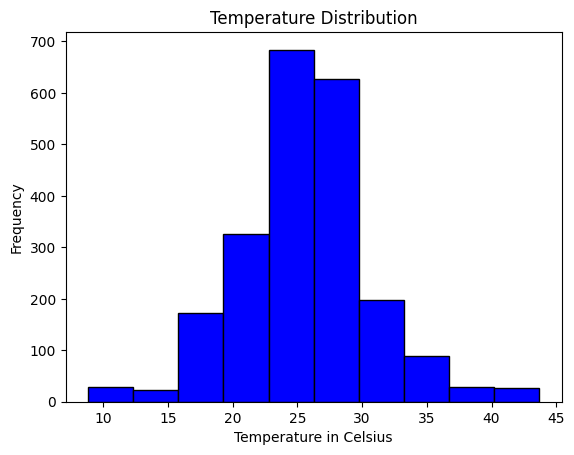

In [14]:
plt.hist(df['temperature'],color="blue",edgecolor="black")
plt.xlabel("Temperature in Celsius")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")

Text(0.5, 1.0, 'Rainfall Distribution')

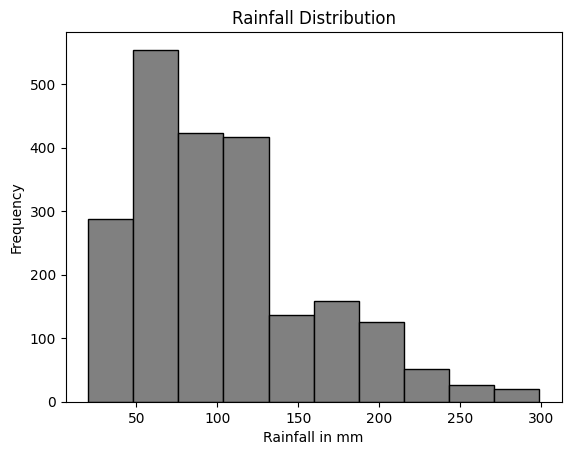

In [15]:
plt.hist(df['rainfall'],color="grey",edgecolor="black")
plt.xlabel("Rainfall in mm")
plt.ylabel("Frequency")
plt.title("Rainfall Distribution")

## Correlations

In [16]:
x=df['rainfall']
y=df['humidity']
y.corr(x)

0.0944230533485546

In [17]:
x=df['rainfall']
y=df['temperature']
y.corr(x)

-0.030083780898041385

#### Positive correlation bw rainfall and humidity

#### Negative Correlation bw rainfall and temperature

In [18]:
x=df['rainfall']
y=df['ph']
y.corr(x)

-0.10906948370282984

In [19]:
x=df['temperature']
y=df['ph']
y.corr(x)

-0.01779501709456344

### Correlation matrix

In [20]:
df_corr=df.drop(columns=['label'])
df_corr.corr()

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

### Heatmap for correlation matrix

In [21]:
df_heatmap=df.drop(columns=["label"]) #dropping string values for plotting a heatmap

<Axes: >

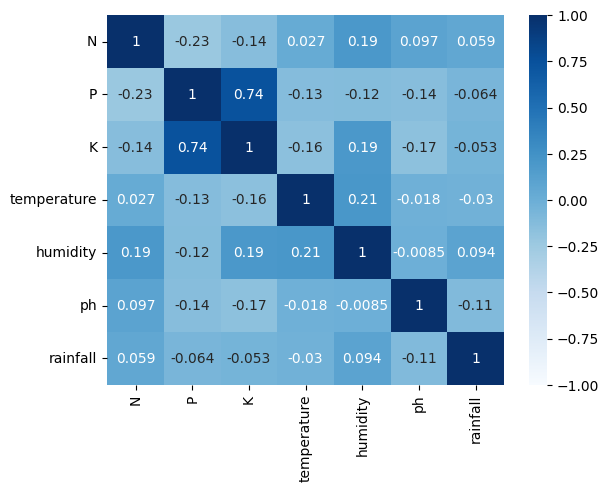

In [22]:
sns.heatmap(df_heatmap.corr(),annot=True,vmin=-1,vmax=1,cmap="Blues")

### Heatmap for rainfall corresponding to each crop

<Axes: xlabel='rainfall', ylabel='label'>

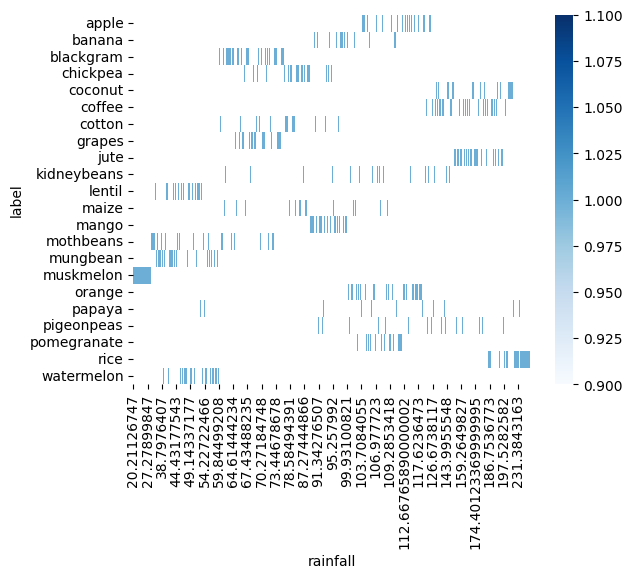

In [23]:
sns.heatmap(df.groupby('label').rainfall.value_counts().fillna(0).unstack(),cmap="Blues")

### Heatmap corresponding to humidity and each crop

<Axes: xlabel='humidity', ylabel='label'>

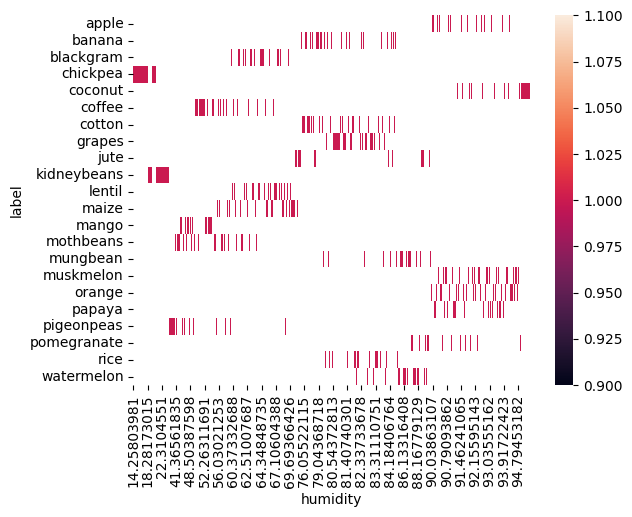

In [24]:
sns.heatmap(df.groupby('label').humidity.value_counts().fillna(0).unstack())

### Pairwise Plot

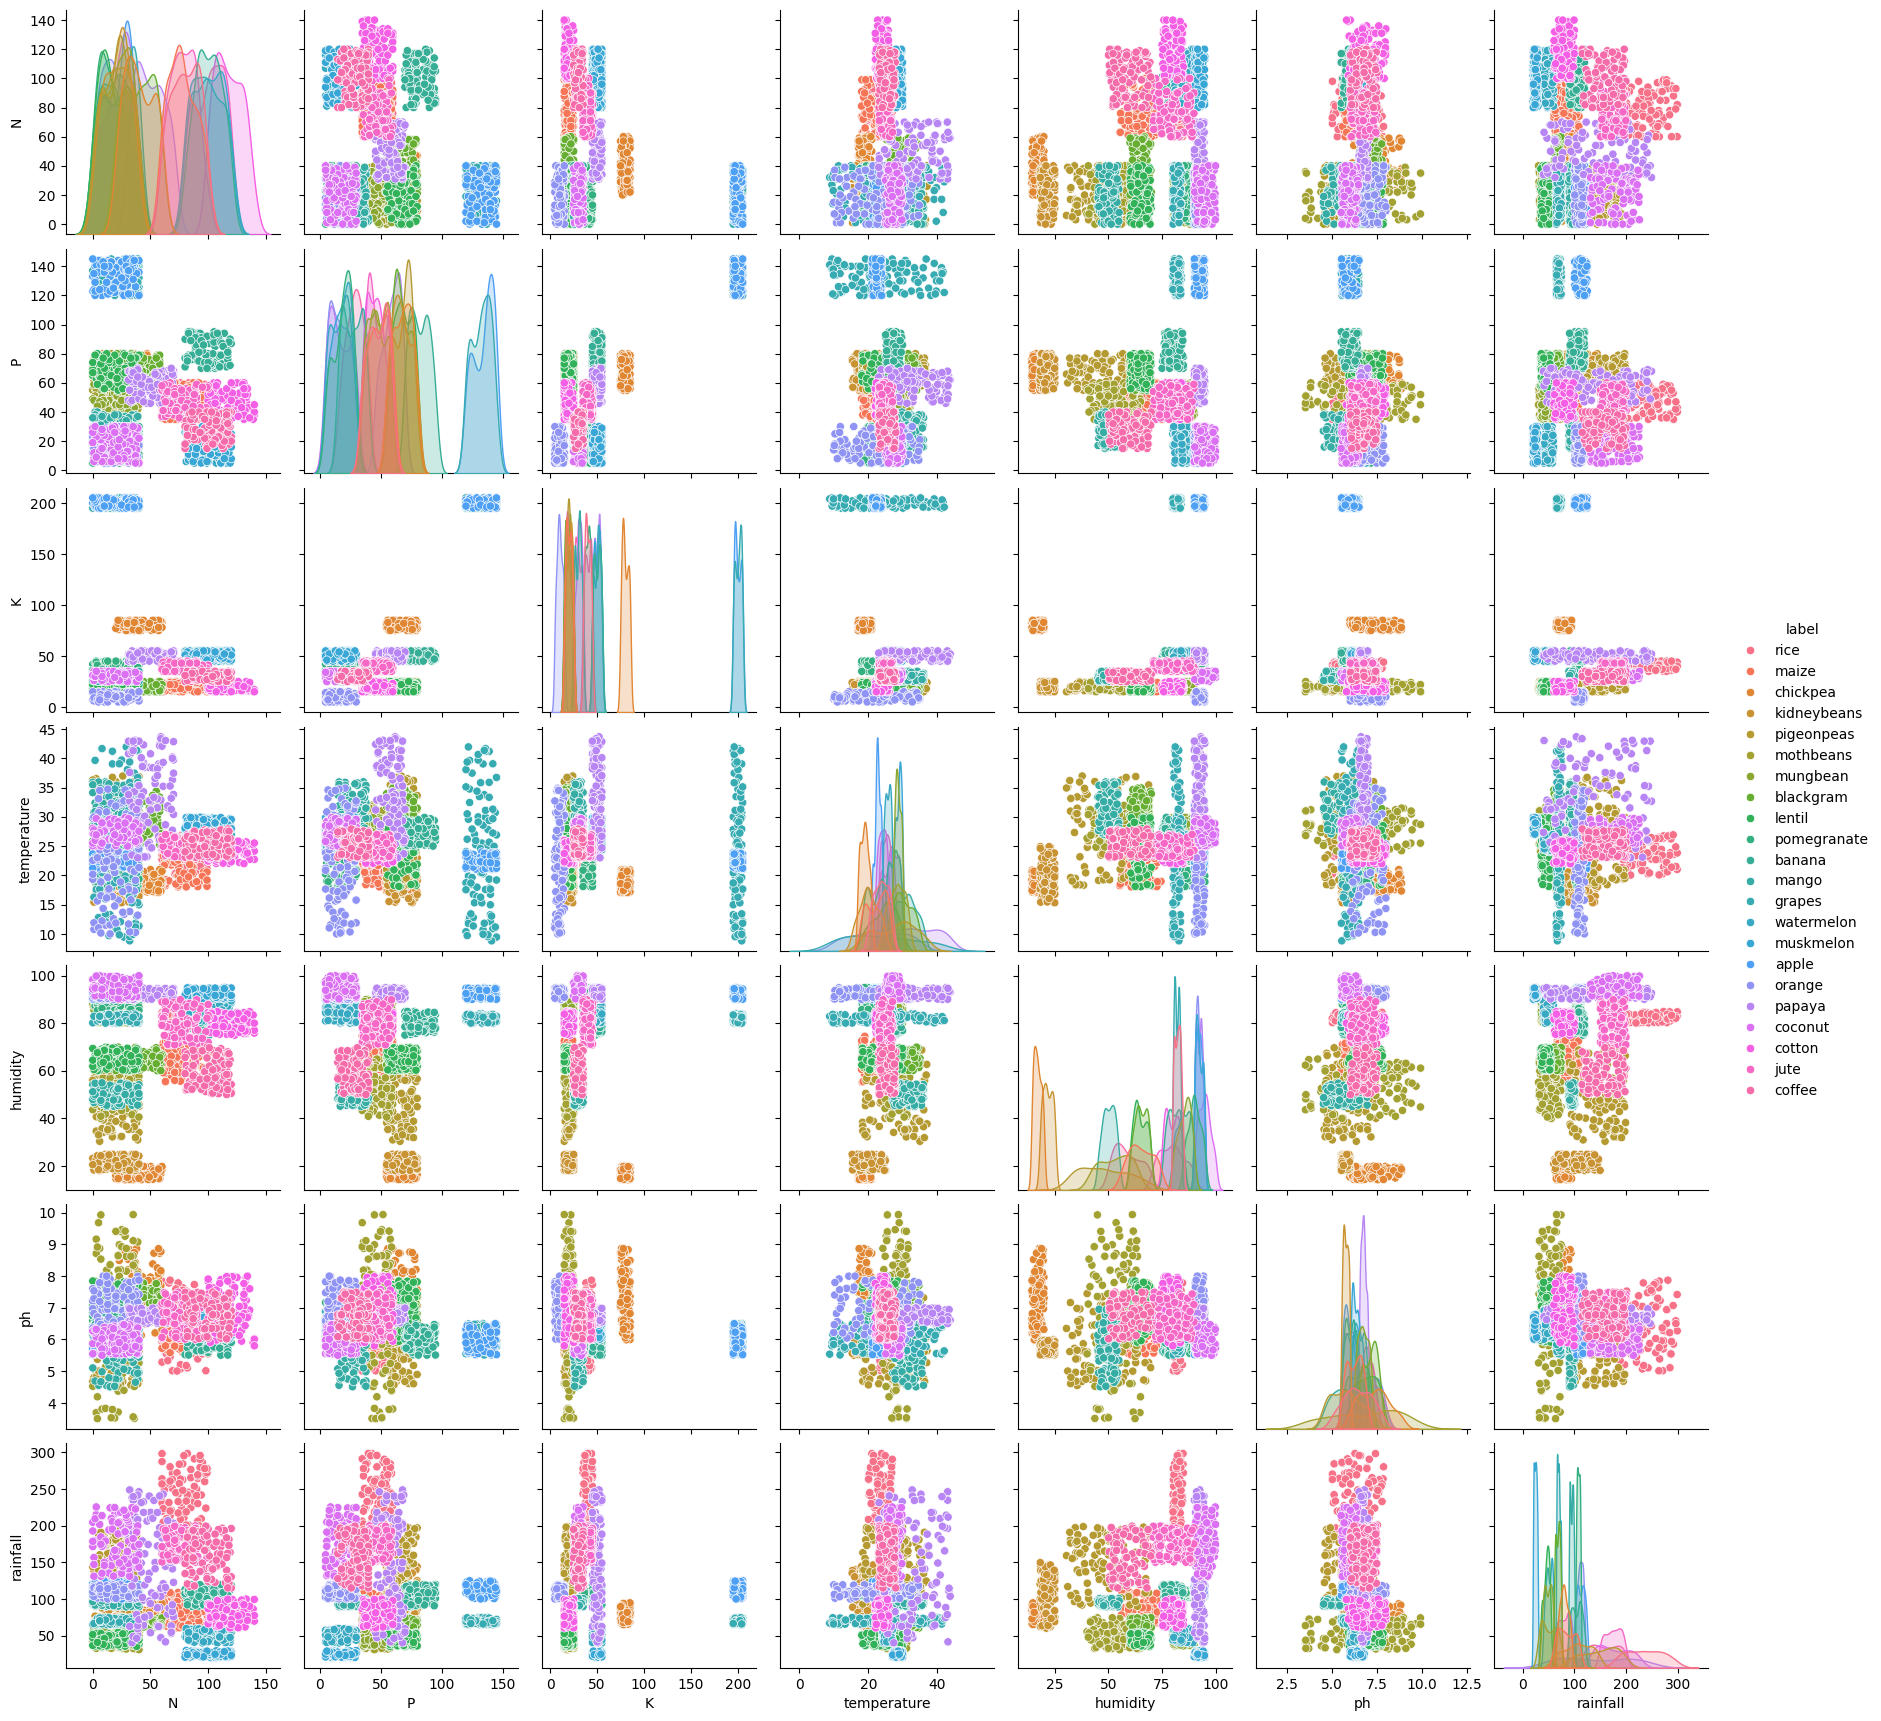

In [44]:
pair_plot=sns.pairplot(df,hue="label")

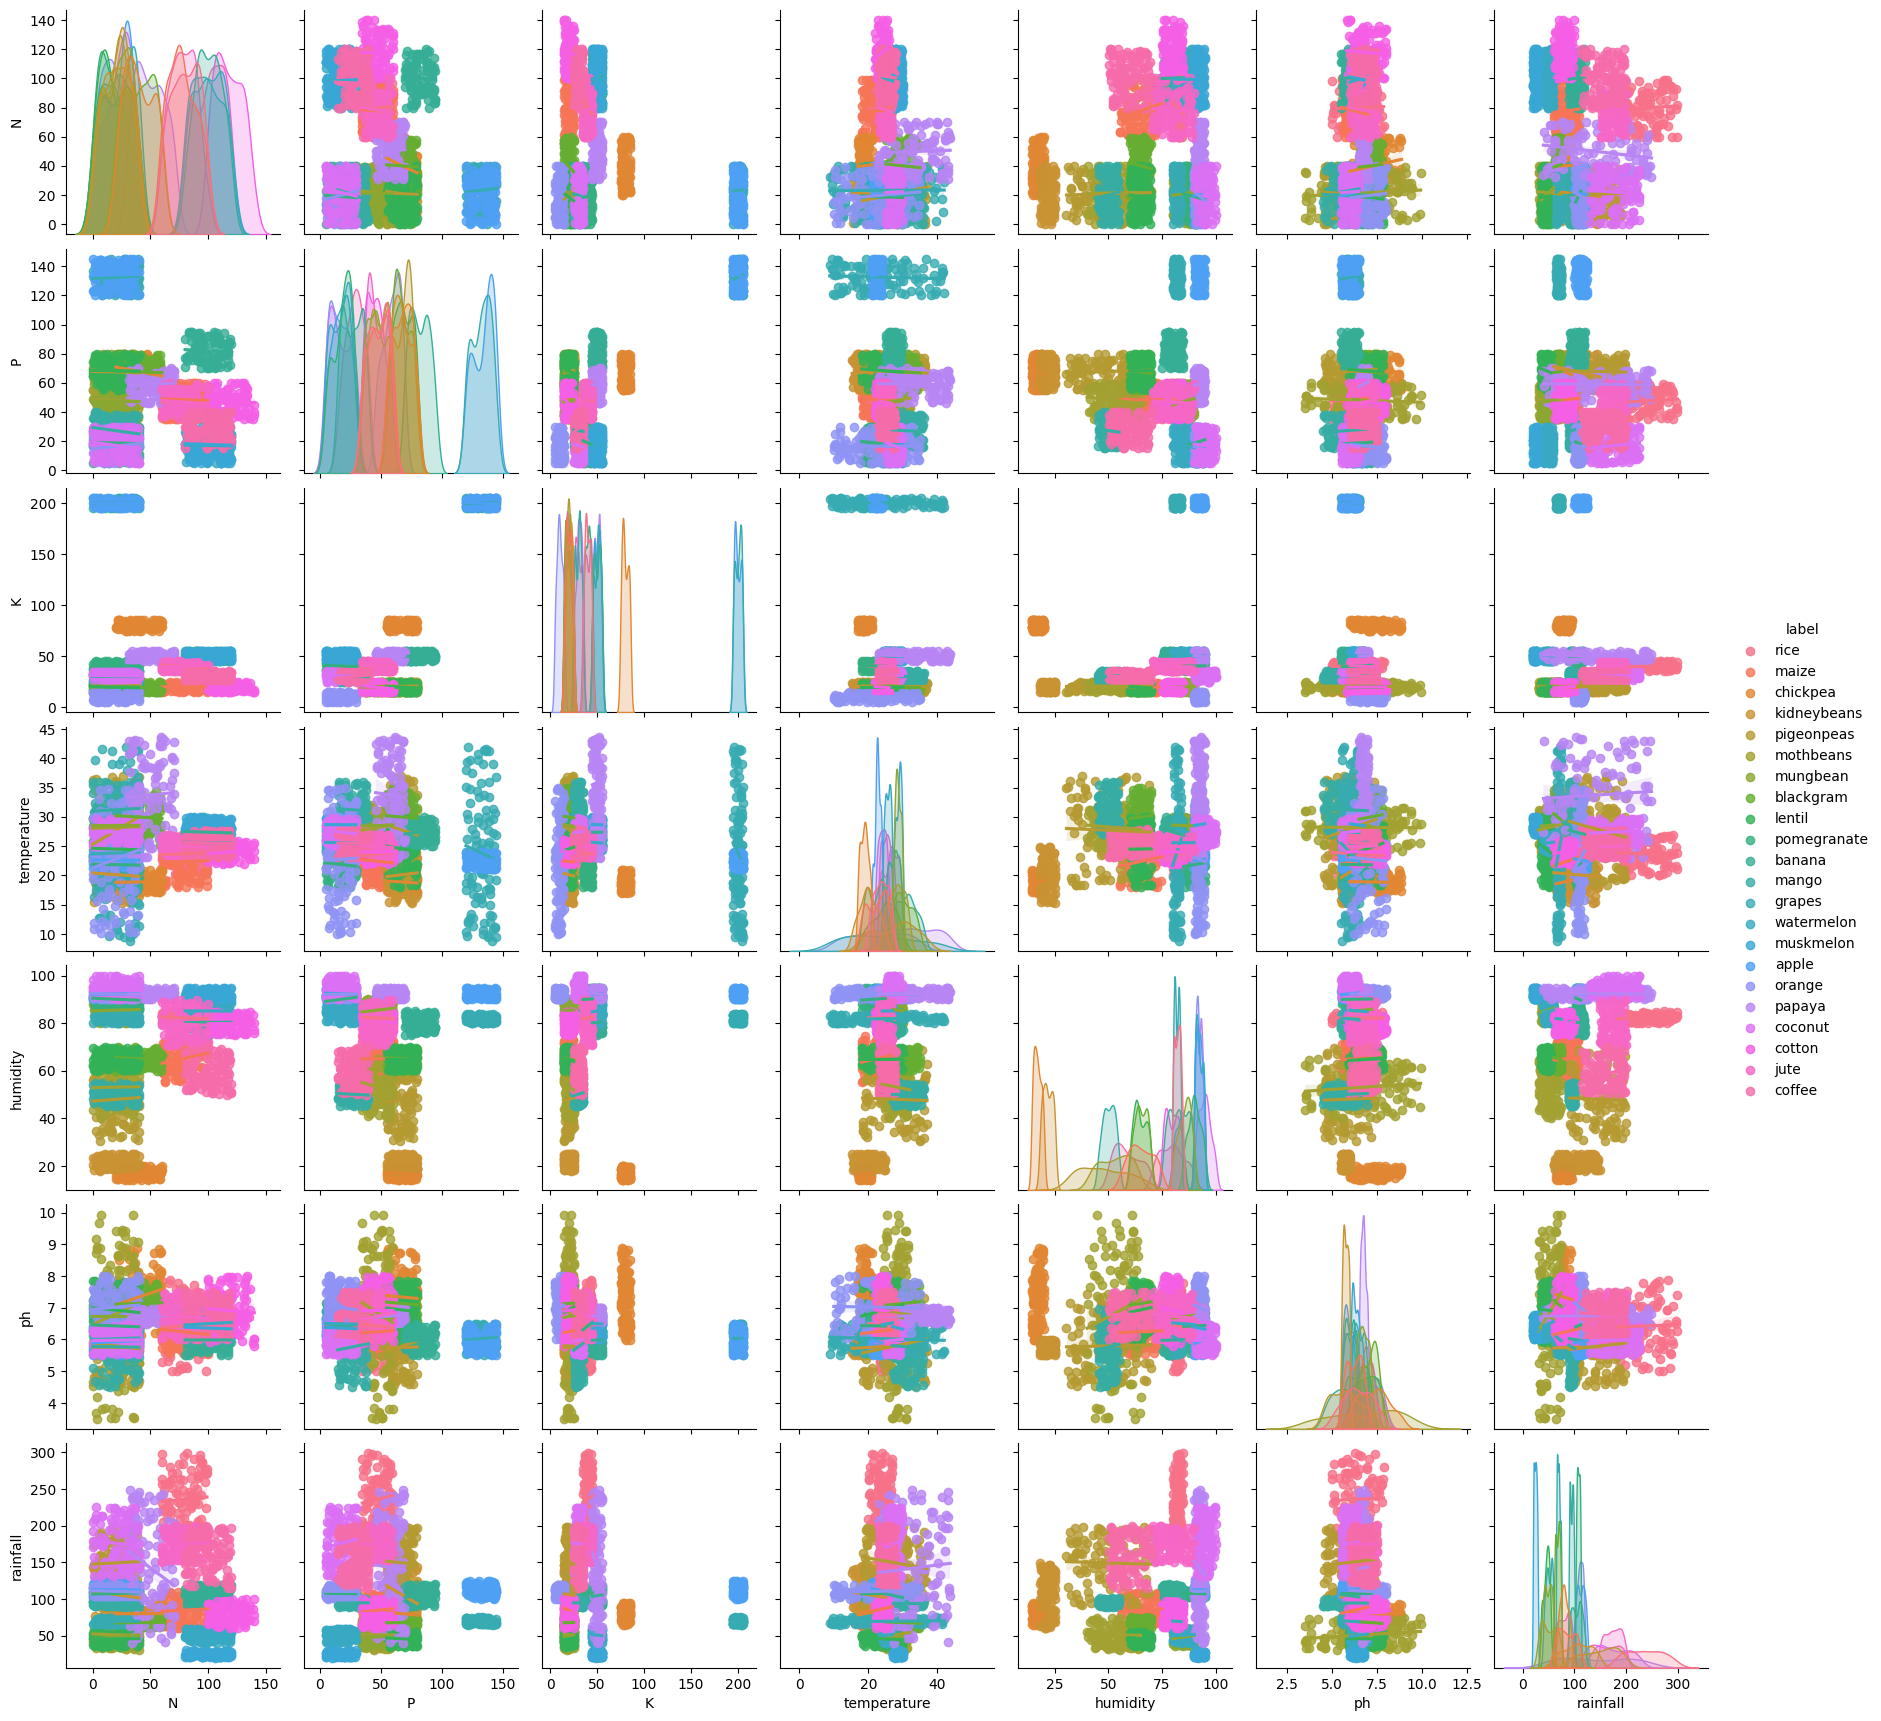

In [25]:
sns.pairplot(df,hue="label",kind="reg")

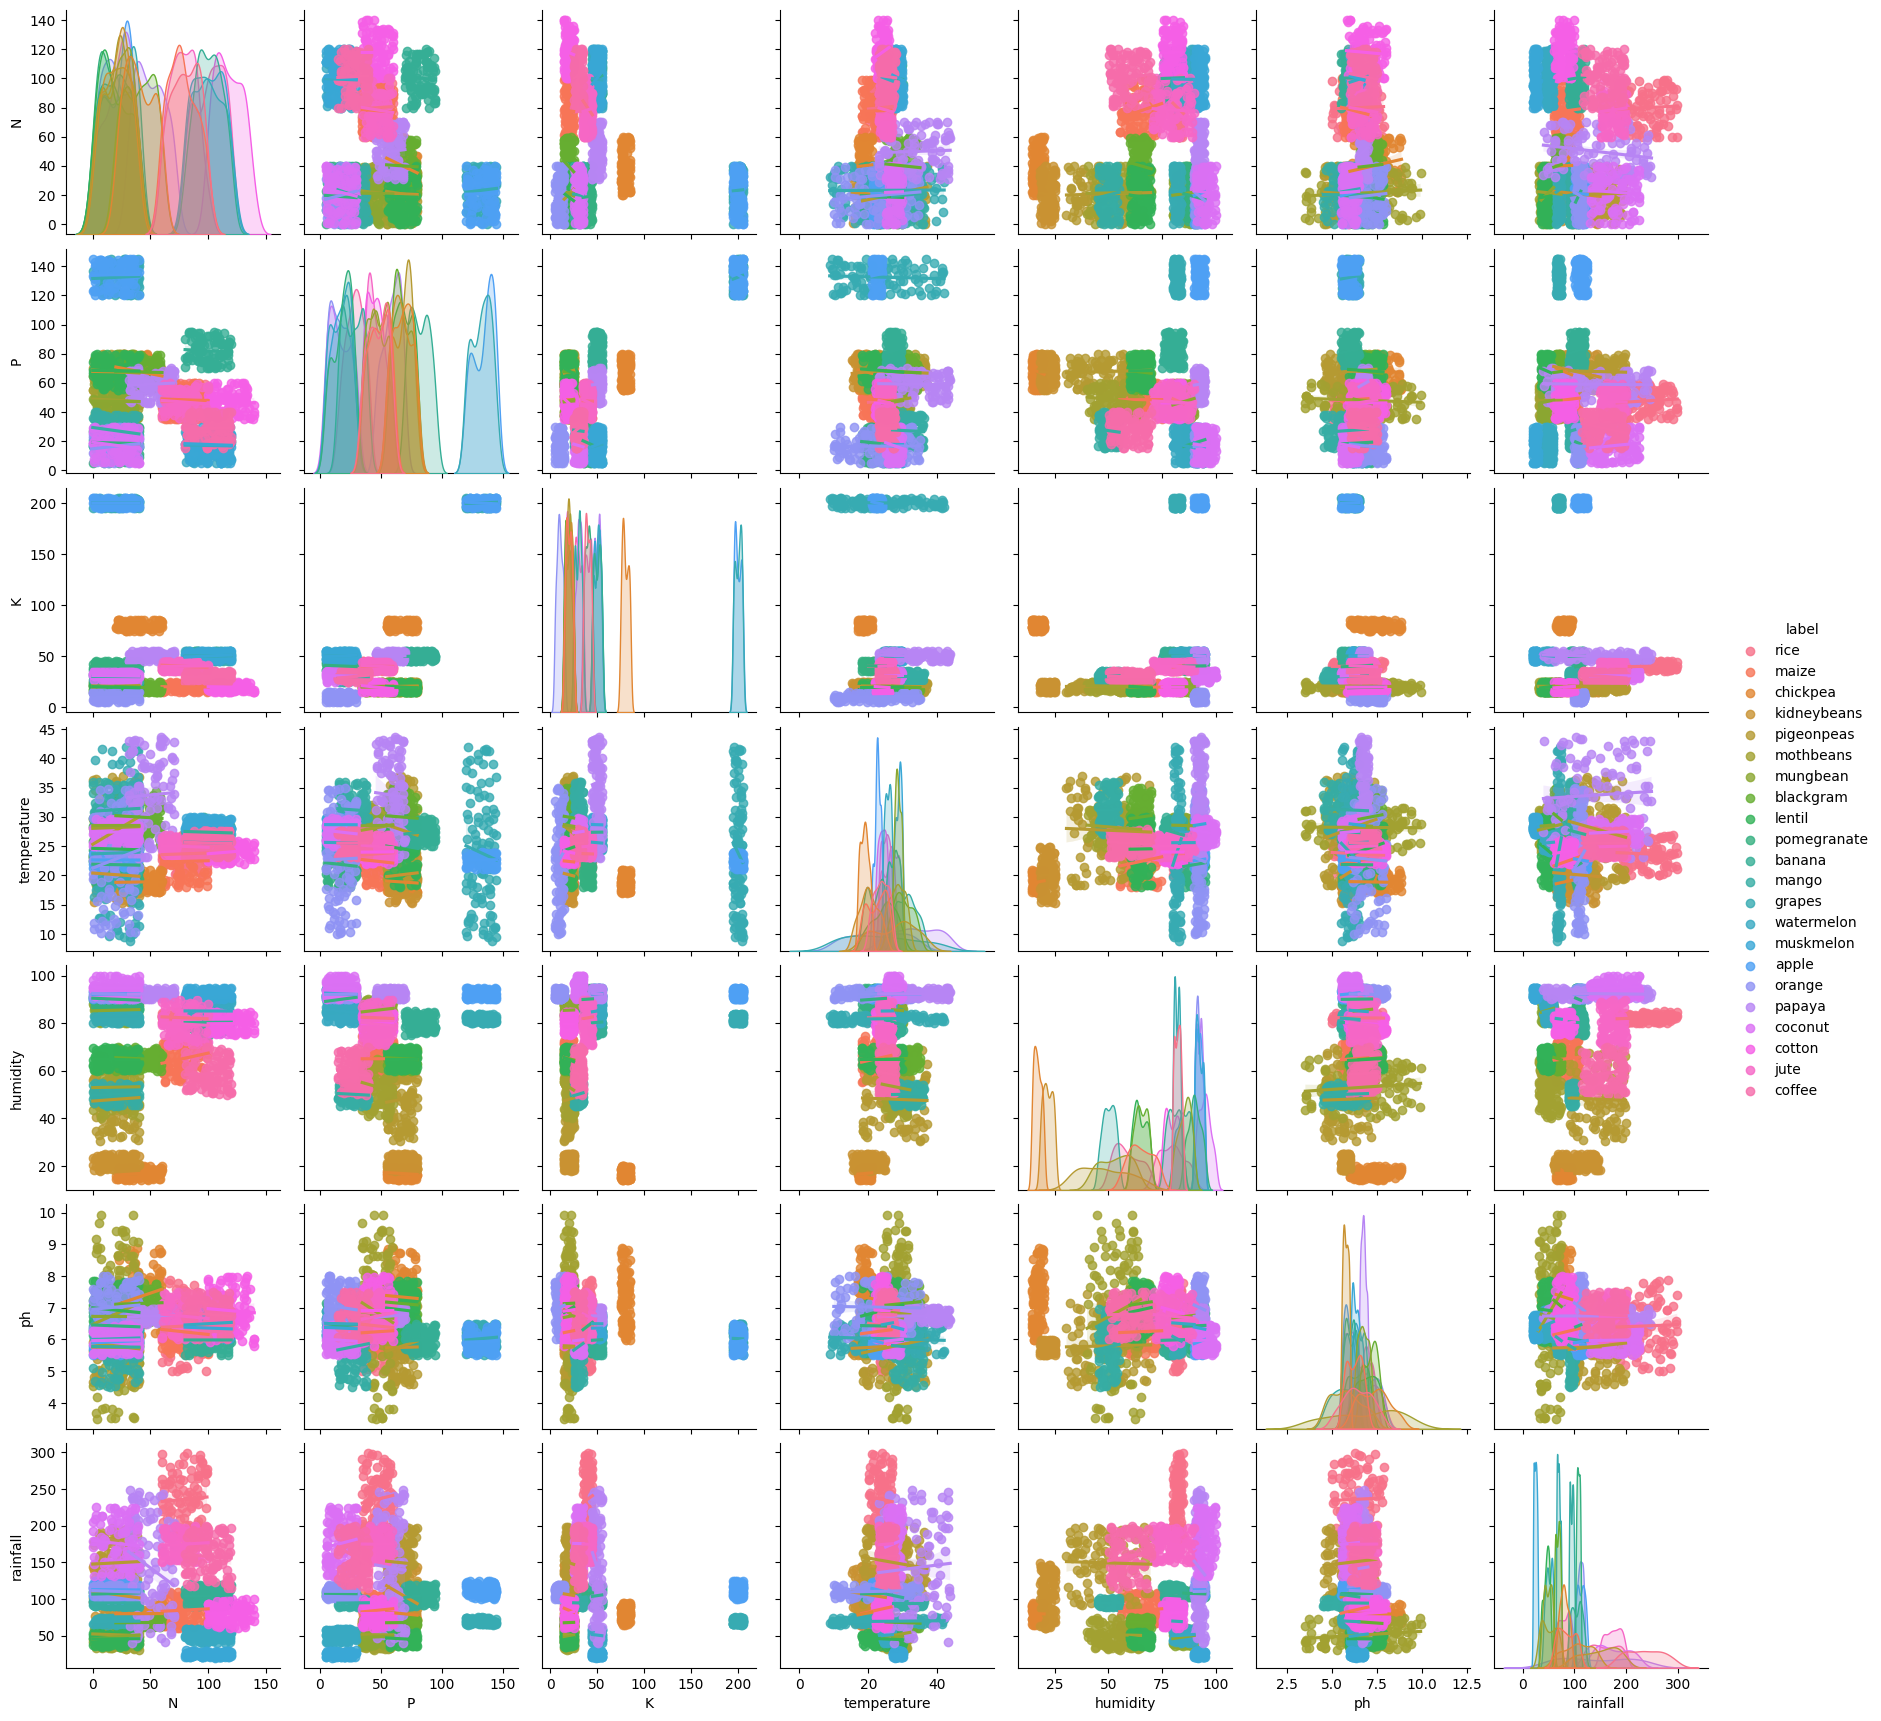

In [27]:
sns.pairplot(df,hue="label",kind="reg",diag_kind="kde")